#### Jose Daniel Arango Lopez
#### Miriam Zareth Osorio Mendoza
#### Santiago Franco Alfonso

## Proyecto Final: Clasificador de frutas

In [1]:
#importar las librerias.
import numpy as np
import pandas as pd 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from scipy.spatial import distance
from sklearn.linear_model import LogisticRegression
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Procesamiento de los datos

Este apartado es para realizar un procesamiento previo a los datos, para obtener las caracteristicas y etiquetas a partir de las imagenes de las frutas.

### Obtencion del histograma de una sola imagen

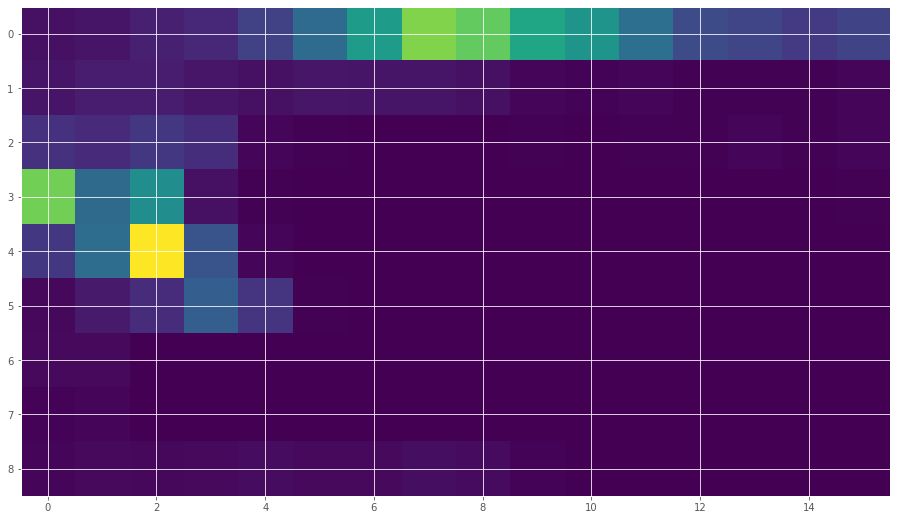

[6.4000e+02 8.0700e+02 1.2160e+03 1.5740e+03 2.7320e+03 4.9000e+03
 7.7720e+03 1.1412e+04 1.0697e+04 8.2810e+03 7.2800e+03 5.1510e+03
 3.2810e+03 2.9190e+03 2.3740e+03 2.8660e+03 7.6900e+02 1.1430e+03
 1.1350e+03 8.3500e+02 6.2100e+02 8.2500e+02 8.0000e+02 8.0400e+02
 6.1600e+02 2.0300e+02 1.1000e+02 1.8500e+02 9.2000e+01 9.5000e+01
 7.5000e+01 2.3400e+02 1.9830e+03 1.6590e+03 2.2910e+03 1.8230e+03
 2.5500e+02 6.7000e+01 3.5000e+01 2.1000e+01 1.8000e+01 5.7000e+01
 4.6000e+01 8.5000e+01 1.0500e+02 1.8000e+02 5.9000e+01 2.0700e+02
 1.1040e+04 4.8370e+03 6.9000e+03 6.5500e+02 8.2000e+01 5.4000e+01
 3.9000e+01 2.0000e+01 9.0000e+00 1.1000e+01 1.1000e+01 2.5000e+01
 2.5000e+01 2.9000e+01 9.0000e+00 7.6000e+01 2.2840e+03 5.0380e+03
 1.4055e+04 3.6400e+03 2.5600e+02 3.9000e+01 2.0000e+01 8.0000e+00
 7.0000e+00 3.0000e+00 4.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 2.9700e+02 1.0380e+03 1.7610e+03 4.1990e+03
 2.0930e+03 1.0300e+02 3.7000e+01 2.3000e+01 1.1000e+01 5.0000

In [2]:
# Preprocesamiento de los datos, importar las imagenes y obtener los histogramas, imagen a imagen
# Importar la imagen y se almacena en una variable.
img = cv2.imread('C:/Users/Santiago.Lenovo-PC/Documents/Inteligencia Artificial/Proyecto final/Datos/Apple/Apple A/Apple 1.png')
# Se aplica un cambio de espacio de color de RGB a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Se calcula el histograma de la imagen 
hist = cv2.calcHist( [hsv], [0, 1], None, [9, 16], [0, 180, 0, 256] )
# Se muestra el resultado del proceso
plt.imshow(hist,interpolation = 'nearest')
plt.show()
# Los datos del Histograma se convierten en vectores.
vectorhist=hist.flatten()
print(vectorhist)

### Obtencion del arreglo de datos por carpeta de fruta

In [23]:
# Preprocesamiento de los datos, importartodas las imagenes automaticamente y obtnecion de su histograma
# Para obtener las caracteristicas de las frutas y exportarlas a un archivo de texto.
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist( [hsv], [0, 1], None, [9, 16], [0, 180, 0, 256] )
        vectorhist=hist.flatten()
        if img is not None:
            images.append(vectorhist)
        np.savetxt('Kiwis.txt', images ,delimiter=",")

folder='Datos/KiwiA/'
load_images_from_folder(folder)

### Inicio solucion del proyecto

A partir de este punto ya se cuenta con los datos en un archivo .csv y se da inicio al desarrollo del proyecto del clasificador de frutas (Kiwis, Bananas y Manzanas)

In [2]:
# Importar el dataset total de las frutas a evaluar.
data=pd.read_csv('Frutas totales.csv',sep=';', header=None)
# shuffle the DataFrame rows (Se establece unorden aleatorio las filas del dataset para instroducirlas al clasificador.)
data = data.sample(frac = 1) 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
1346,2,579.0,345.0,436.0,392.0,411.0,412.0,508.0,575.0,684.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2133,3,31.0,7.0,3.0,3.0,210.0,143.0,6.0,138.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,1,259.0,88.0,47.0,23.0,18.0,8.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,3,283.0,255.0,276.0,322.0,318.0,87.0,110.0,96.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,1,207.0,30.0,24.0,34.0,40.0,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Se asignas las etiquetas (y) y las caracteristicas (x)
# Etiquetas y:  1. Kiwis, 2. Manzanas, 3. Bananos
y=data.loc[:,0]
x=data.loc[:,1:144]
# Se separa el conjunto de datos en grupo de entrenamiento (75%) y de prueba (25%)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Se desarrolla el proyecto haciendo uso de difernetes clasificadores para poder seleccionar cual de ellos funciona mejor de acuerdo a nuestros datos.

## Utilizando el calsificador KNN

In [4]:
n_neighbors = 15
# ver https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming
distance='euclidean'
knn = KNeighborsClassifier(n_neighbors,metric=distance, metric_params=None)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98
[[164   0   0]
 [  0 178   0]
 [ 10   0 203]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       164
           2       1.00      1.00      1.00       178
           3       1.00      0.95      0.98       213

    accuracy                           0.98       555
   macro avg       0.98      0.98      0.98       555
weighted avg       0.98      0.98      0.98       555



([<matplotlib.axis.XTick at 0xed37dcd148>,
 <a list of 3 Text xticklabel objects>)

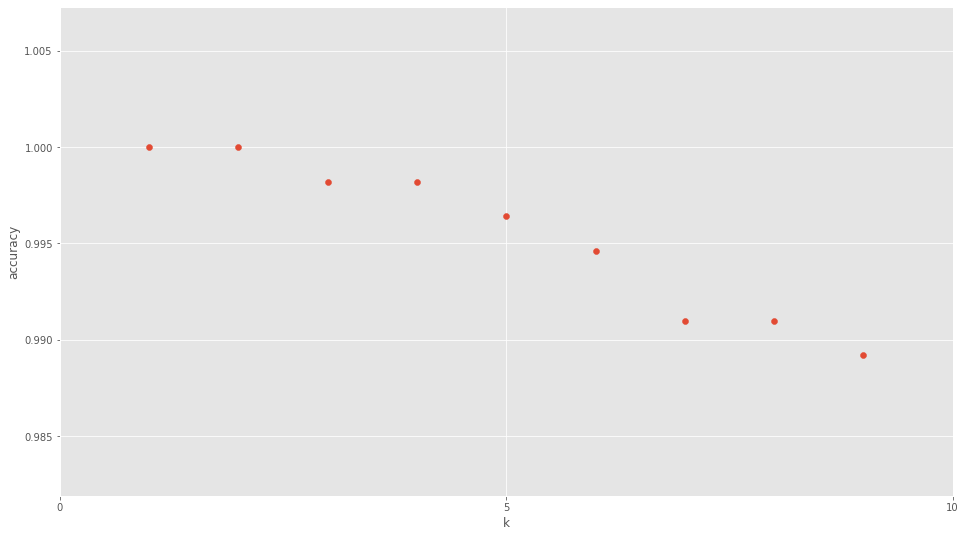

In [5]:
# Grafica para comparar los 'K' contra su metrica de 'accuracy'
#obteniendo el mejor valor de K a partir del conjunto de validación con mejor accuracy
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='distance',metric=distance, metric_params=None)
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10])

## Utilizando el clasificador SVM

In [6]:
from sklearn import svm
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

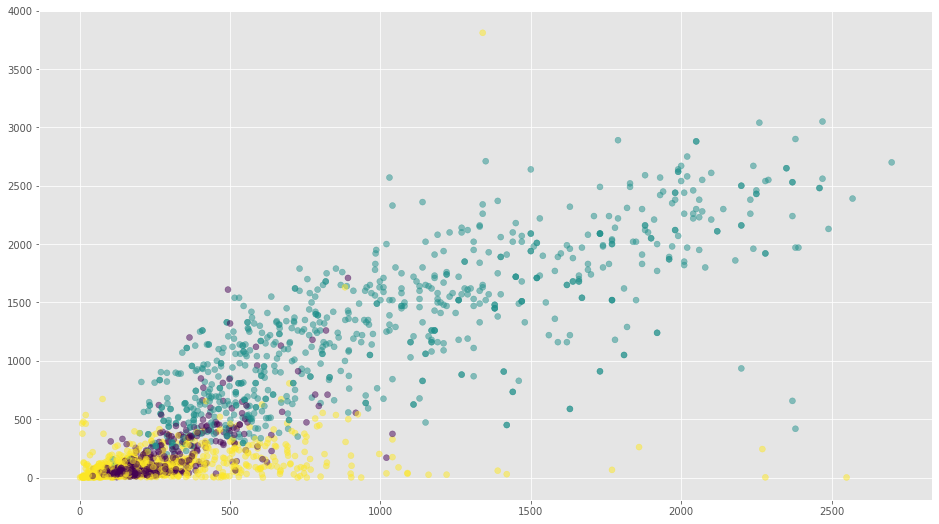

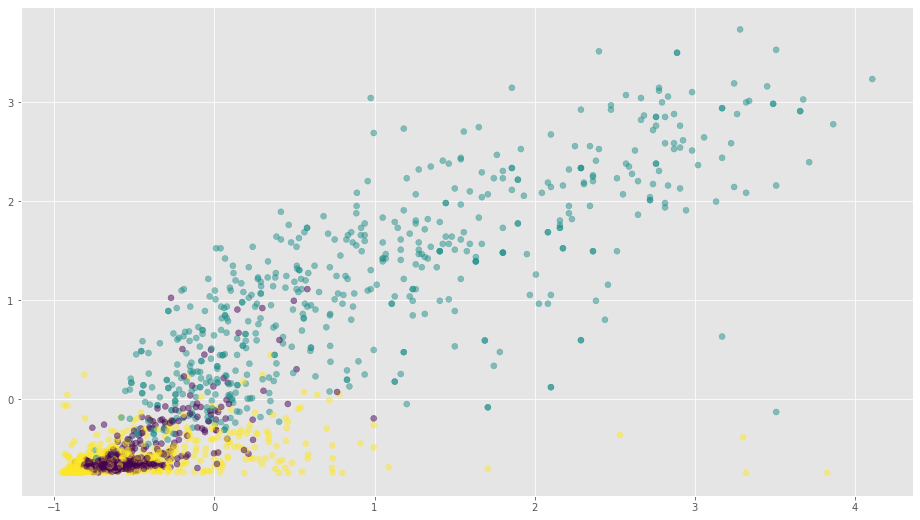

In [7]:
# Grafica del conjunto de datos totales y del conjunto de entrenamiento.
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,alpha=0.5)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.5)#ver: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.show()

In [8]:
# Se crea el arreglo de kernels para realizar pruebas con cada uno y experimentar con cual se obtienen mejores resultados
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
#Kernel=0
#msv = svm.SVC(kernel=kernels[Kernel])
#polinomial cuadrático
Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=2,coef0=1)
#polinomial cúbico
#Kernel=1
#msv = svm.SVC(kernel=kernels[Kernel],degree=3,coef0=1,decision_function_shape ='ovo')
#rbf 
#Kernel=2
#msv = svm.SVC(kernel=kernels[Kernel])
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
msv.fit(X_train, y_train)
pred = msv.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[164   0   0]
 [  0 178   0]
 [  4   0 209]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       164
           2       1.00      1.00      1.00       178
           3       1.00      0.98      0.99       213

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted avg       0.99      0.99      0.99       555



### Utilizando Regresion Logistica

In [9]:
LR = LogisticRegression(penalty='l2', C=0.01,random_state=0)
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [10]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

y_test_predicted = LR.predict(X_test)
y_test_scores = LR.predict_proba(X_test)
MCC = matthews_corrcoef(y_test, y_test_predicted)
print("matthews_corrcoef", MCC)
ACC = accuracy_score(y_test, y_test_predicted)
print("Accuracy", ACC)
#print(y_test_scores[:,1])
print(y_test_predicted)
print("Valores reales")
print(y_test)

matthews_corrcoef 0.975799805998435
Accuracy 0.9837837837837838
[3 2 3 3 1 2 1 1 1 2 1 3 1 1 2 2 1 3 1 3 3 3 1 3 2 1 3 3 3 3 2 3 1 2 3 2 3
 1 1 2 1 1 2 1 1 3 2 1 3 1 2 1 3 1 2 2 1 1 2 3 2 2 2 3 1 3 1 1 2 2 2 1 1 1
 1 3 2 1 3 1 1 3 2 3 1 1 2 1 1 3 1 2 2 2 1 3 2 1 2 2 2 3 1 1 1 1 2 3 3 1 2
 3 1 3 2 2 3 1 3 1 3 2 1 1 1 1 3 1 3 1 3 3 3 2 2 3 2 1 2 1 2 2 3 2 2 2 1 1
 2 1 3 1 2 3 3 3 3 1 3 1 2 3 1 1 1 2 2 2 1 3 2 2 2 3 3 2 3 3 2 2 3 1 3 3 3
 3 2 2 1 1 3 3 1 2 3 3 2 3 3 2 3 2 3 3 2 2 1 2 3 1 2 3 1 2 3 3 1 1 1 2 3 1
 2 3 2 3 1 2 2 3 3 1 3 3 1 1 2 1 3 2 3 1 3 3 2 2 3 3 2 1 1 3 2 1 1 2 3 3 3
 1 1 2 1 2 3 3 3 3 2 3 3 1 1 2 2 2 3 2 2 3 3 3 2 1 2 1 3 1 3 3 3 3 2 1 3 3
 3 2 2 2 2 2 2 1 2 2 3 2 3 2 3 2 2 1 3 1 2 3 3 1 2 3 3 1 1 1 1 3 2 2 2 1 1
 2 1 3 2 2 1 1 3 1 3 3 2 2 3 2 2 1 1 3 1 2 3 3 3 1 2 1 3 3 2 2 3 1 3 1 1 1
 3 1 2 2 3 1 2 3 3 3 1 2 2 1 2 3 3 3 3 2 2 2 3 1 2 1 1 3 3 2 2 2 1 1 2 3 2
 3 3 2 1 3 3 3 1 1 3 2 2 1 3 1 3 3 2 2 3 2 3 1 3 3 3 3 1 3 3 2 2 2 1 3 1 1
 1 3 2 3 1 3 2 2 1 2 3 1 3 3 1 1 2 3

### Utilizando ANN

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(8, 8, 2), activation='relu', random_state=1, max_iter=500,verbose=False)
clf.fit(X_train, y_train)
print('La probabilidad de prediccion es: ',clf.predict_proba(X_test[:1]))
print('La predicion sobre el conjunto de test es: ',clf.predict(X_test[:5, :]))
print('El score de la red es: ',clf.score(X_test, y_test))

La probabilidad de prediccion es:  [[1.33124289e-06 8.77463635e-07 9.99997791e-01]]
La predicion sobre el conjunto de test es:  [3 2 3 3 3]
El score de la red es:  0.9981981981981982
